# Superstore Sales Analysis

This project analyzes data from a fictional retail chain.
We will explore trends and patterns to make conclusions to support better business practices.

**Tools**
    - Python
    - Pandas
    - Data visualization tools (matplotlib, seaborn)

**Objectives**
    - Update later with questions used

In [7]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the Dataset
df = pd.read_csv("Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

np.int64(0)

In [4]:
# Data Cleaning

# Datetime conversion
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Remove duplicate entries
df = df.drop_duplicates()

# Add other useful columns
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df["Profit Margin"] = df["Profit"] / df["Sales"]



In [ ]:
# Data Analysis

In [ ]:
# Topic 1

Text(0, 0.5, 'Amount ($)')

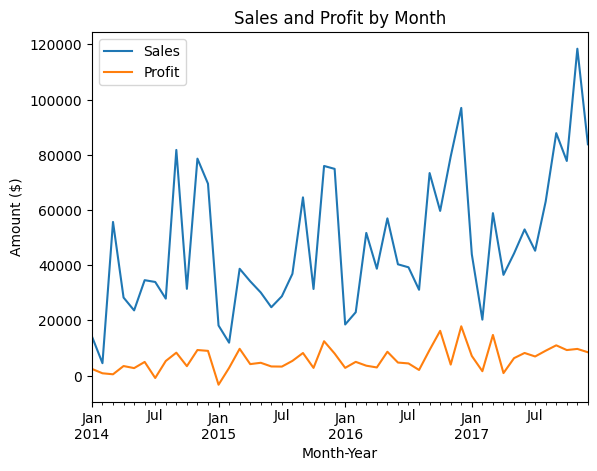

In [31]:
df["Month-Year"] = df["Order Date"].dt.to_period("M")
monthly = df.groupby("Month-Year")[["Sales","Profit"]].sum().reset_index()

monthly.plot(x="Month-Year", y=["Sales","Profit"], kind="line")
plt.title("Sales and Profit by Month")
plt.ylabel("Amount ($)")

Text(0, 0.5, 'Amount ($)')

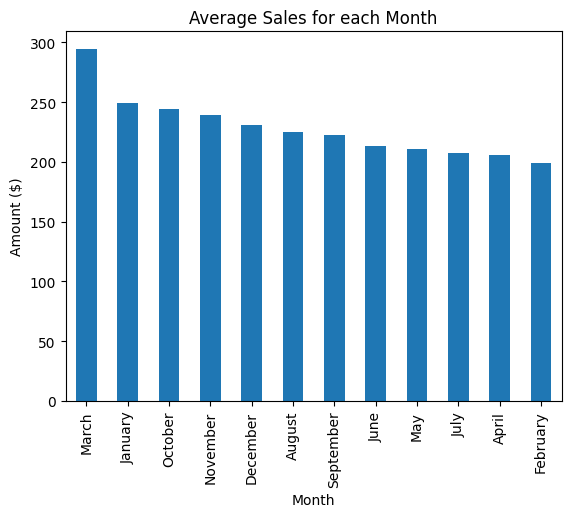

In [37]:
df["Month"] = df["Order Date"].dt.month_name()
df.groupby("Month")["Sales"].mean().sort_values(ascending=False).head(12).plot(kind='bar')

plt.title("Average Sales for each Month")
plt.ylabel("Amount ($)")


Text(0, 0.5, 'Amount ($)')

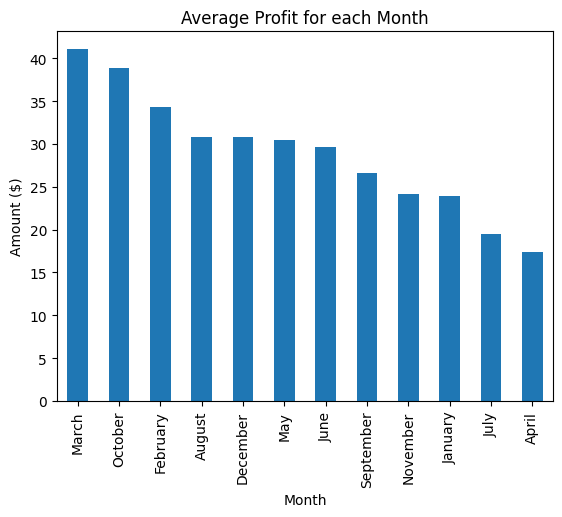

In [36]:
df.groupby("Month")["Profit"].mean().sort_values(ascending=False).head(12).plot(kind='bar')

plt.title("Average Profit for each Month")
plt.ylabel("Amount ($)")

In [ ]:
# Conclusion
.....

In [ ]:
# Topic 2

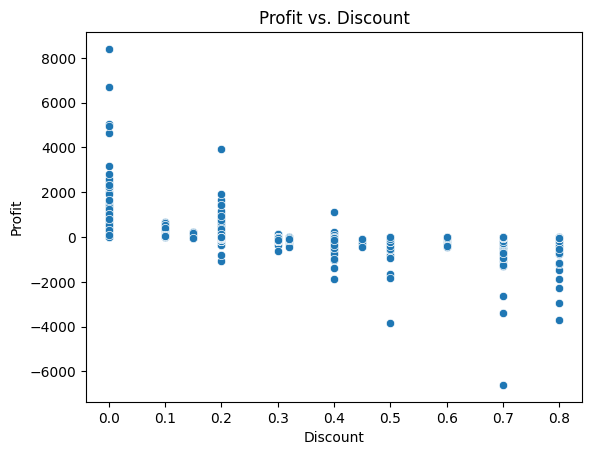

In [39]:
sns.scatterplot(data=df, x="Discount", y="Profit")
plt.title('Profit vs. Discount')
plt.show()

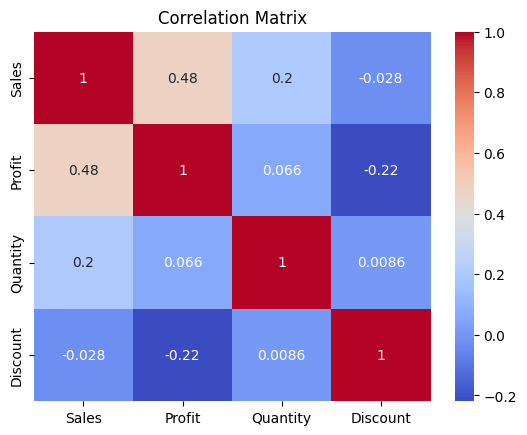

In [9]:
corr = df[["Sales","Profit","Quantity","Discount"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [11]:
filter = df[df["Discount"] != 0]
filter.groupby("Sub-Category")[["Profit","Discount"]].size()

Sub-Category
Accessories     304
Appliances      195
Art             298
Binders        1186
Bookcases       168
Chairs          484
Copiers          46
Envelopes       102
Fasteners        89
Furnishings     386
Labels          125
Machines         86
Paper           513
Phones          578
Storage         316
Supplies         73
Tables          247
dtype: int64

In [19]:
df["Discounted"] = df["Discount"] > 0

profit_comp = df.groupby(["Sub-Category","Discounted"])["Profit"].mean().unstack()
profit_comp.columns = ["No Discount", "With Discount"]

profit_comp

,No Discount,With Discount
Sub-Category,,
Accessories,74.924106,21.866388
Appliances,85.548842,-25.875542
Art,10.804419,3.849619
Binders,116.660091,-7.666684
Bookcases,101.261862,-56.834927
Chairs,164.910497,9.622046
Copiers,1616.187950,436.123696
Envelopes,32.743318,19.482277
Fasteners,5.095353,3.340596


In [ ]:
# Topic 3

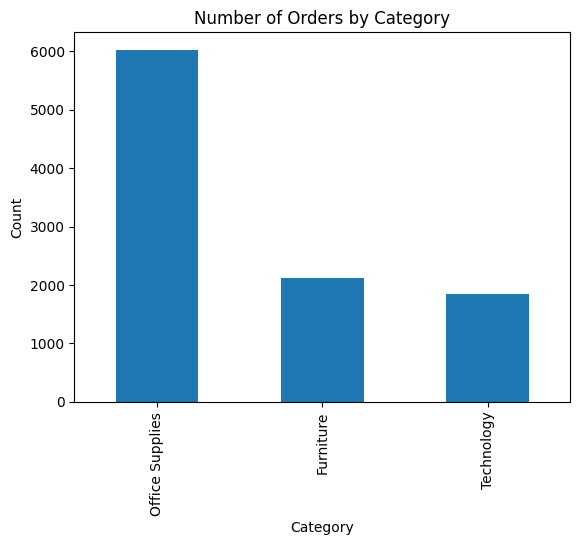

In [7]:
df["Category"].value_counts().plot(kind="bar")
plt.title("Number of Orders by Category")
plt.ylabel("Count")
plt.show()

In [21]:
df.groupby("Category")[["Sales","Profit"]].sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


In [28]:
df.groupby("Sub-Category")[["Sales","Profit"]].sum()

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


In [ ]:
# Conclusion

In [ ]:
# Next Topics: Segments, Regions/States, Shipping

Text(0.5, 1.0, 'Total Sales & Profit by Segment')

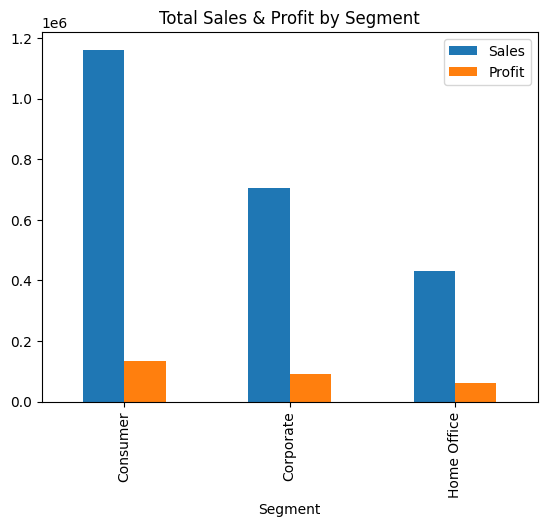

In [9]:
# Segment
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind='bar')
plt.title('Total Sales & Profit by Segment')

Text(0.5, 1.0, 'Mean Sales & Profit by Segment')

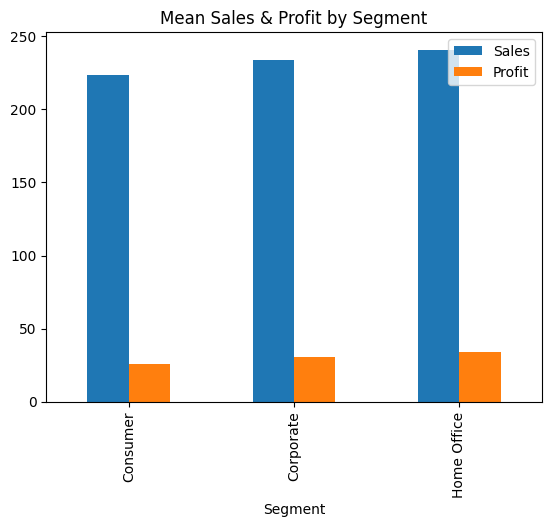

In [10]:
df.groupby("Segment")[["Sales","Profit"]].mean().plot(kind='bar')
plt.title('Mean Sales & Profit by Segment')

In [13]:
df.groupby('Segment')["Profit Margin"].mean()

Segment
Consumer       0.112050
Corporate      0.121203
Home Office    0.142870
Name: Profit Margin, dtype: float64

In [ ]:
# Regions/States

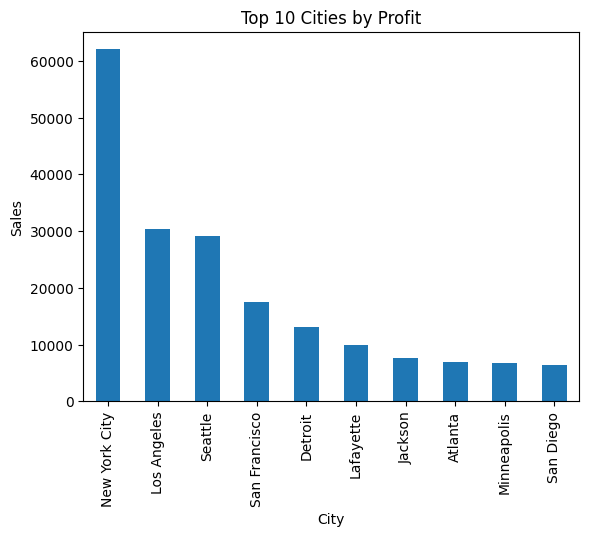

In [8]:
df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Cities by Profit')
plt.ylabel('Sales')
plt.show()

Text(0.5, 1.0, 'Top 10 States by Profit')

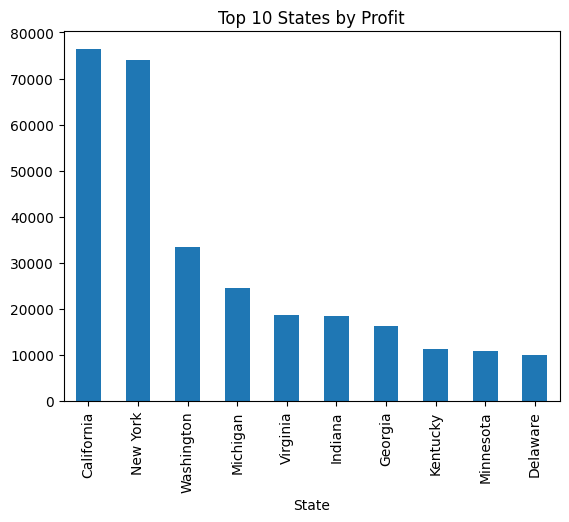

In [9]:
df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States by Profit")

Text(0.5, 1.0, 'Bottom 10 States by Profit')

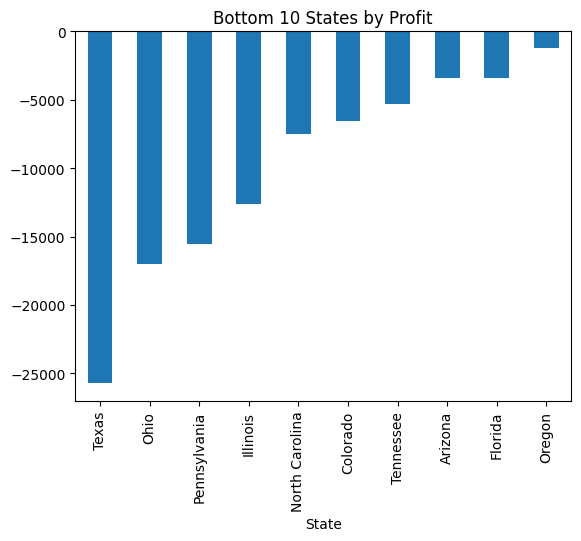

In [11]:
df.groupby("State")["Profit"].sum().sort_values(ascending=True).head(10).plot(kind='bar')
plt.title("Bottom 10 States by Profit")

<Axes: xlabel='Region'>

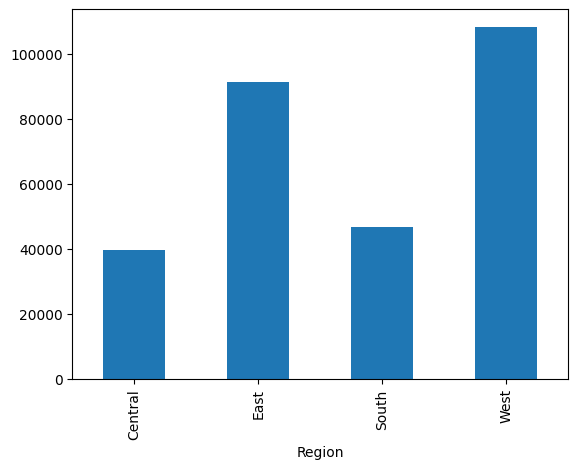

In [13]:
df.groupby("Region")["Profit"].sum().plot(kind='bar')

<Axes: ylabel='Profit'>

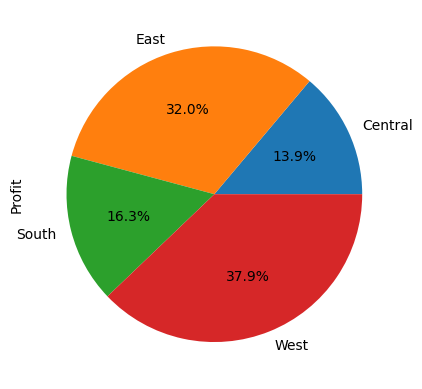

In [15]:
df.groupby("Region")["Profit"].sum().plot(kind='pie', autopct='%1.1f%%')

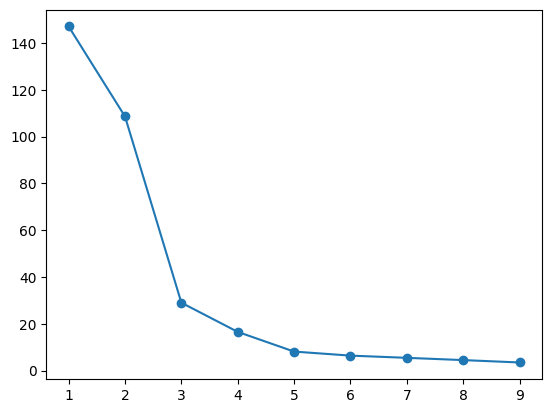

In [13]:


state_data = df.groupby("State")[["Sales","Profit","Discount"]].mean()

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_data)

# find the optimal amount of clusters
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')

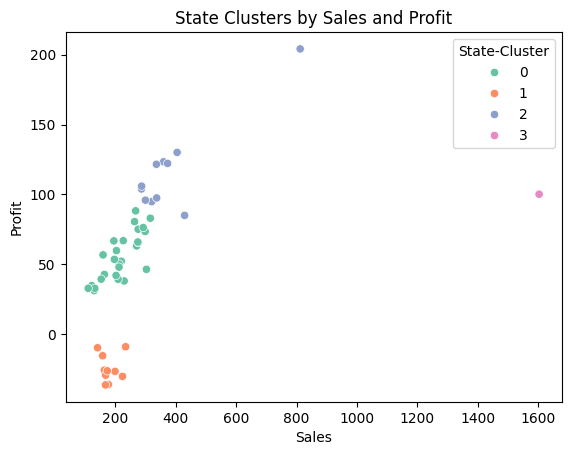

In [17]:
# Since 4 appears to be the approximate elbow point, we choose k=4

# Assign each state to one of 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
state_data["State-Cluster"] = kmeans.fit_predict(scaled_data)

sns.scatterplot(data=state_data, x="Sales", y="Profit", hue="State-Cluster", palette="Set2")
plt.title("State Clusters by Sales and Profit")
plt.show()

In [18]:
state_data["Profit Margin"] = state_data["Profit"] / state_data["Sales"]

state_data.groupby("State-Cluster")[["Sales","Profit","Discount","Profit Margin"]].mean()

,Sales,Profit,Discount,Profit Margin
State-Cluster,,,,
0,218.593286,55.809634,0.019147,0.258519
1,180.003861,-24.336105,0.319670,-0.137455
2,385.474063,116.786292,0.014813,0.313257
3,1603.136000,100.196000,0.200000,0.062500


In [19]:
for cluster in sorted(state_data["State-Cluster"].unique()):
    print(f"\nCluster {cluster}:")
    print(state_data[state_data['State-Cluster'] == cluster].index.tolist())


Cluster 0:
['Arkansas', 'California', 'Connecticut', 'Georgia', 'Idaho', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 'Utah', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']

Cluster 1:
['Arizona', 'Colorado', 'Florida', 'Illinois', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Tennessee', 'Texas']

Cluster 2:
['Alabama', 'Delaware', 'District of Columbia', 'Indiana', 'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nevada', 'Rhode Island', 'Vermont']

Cluster 3:
['Wyoming']


In [ ]:
# Shipping

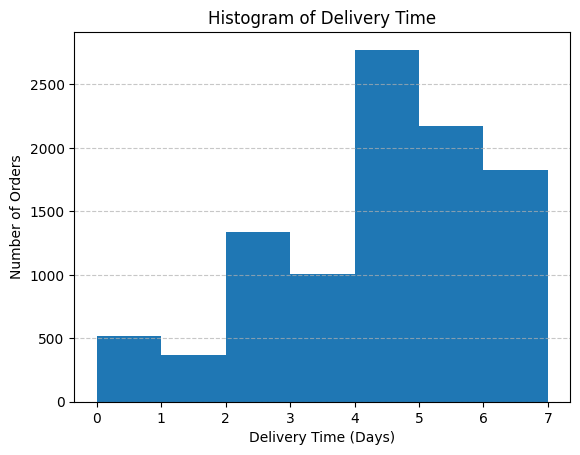

In [26]:
plt.hist(df["Delivery Time"], bins=range(df["Delivery Time"].min(),df["Delivery Time"].max() +1))
plt.xticks(range(df['Delivery Time'].min(), df['Delivery Time'].max() + 1))
plt.title("Histogram of Delivery Time")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

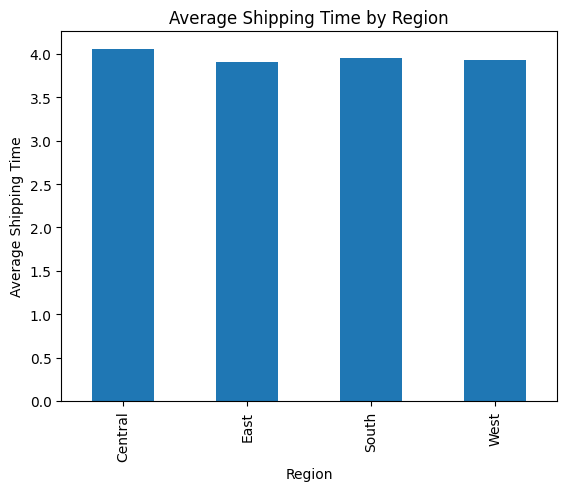

In [29]:
df.groupby('Region')['Delivery Time'].mean().plot(kind='bar')
plt.title('Average Shipping Time by Region')
plt.ylabel('Average Shipping Time')
plt.show()

In [27]:
df.groupby("Ship Mode")["Delivery Time"].mean()

Ship Mode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006535
Name: Delivery Time, dtype: float64

<Axes: xlabel='Ship Mode', ylabel='Delivery Time'>

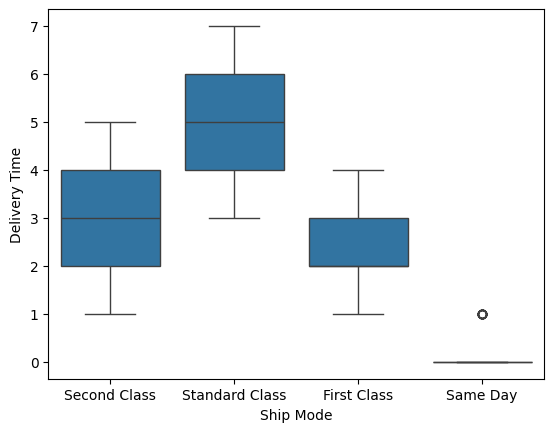

In [28]:
sns.boxplot(x="Ship Mode",y="Delivery Time",data=df)